In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/AI_ML_Fundamentals' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/AI_ML_Fundamentals


### 1. Introduction
You are working in hospital and your job is to analyze the patients information (e.g. age, glucose and etc.) to find some patterns. This will help your team to understand the patients conditions properly.

In [24]:
#importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 2. Load Data

In [25]:
dat = pd.read_csv('diabetes.csv')
dat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
#select column Age & Glucose
df = dat[['Age', 'Glucose']]
df.head()

,Age,Glucose
0,50,148
1,31,85
2,32,183
3,21,89
4,33,137


Text(0, 0.5, 'Glucose')

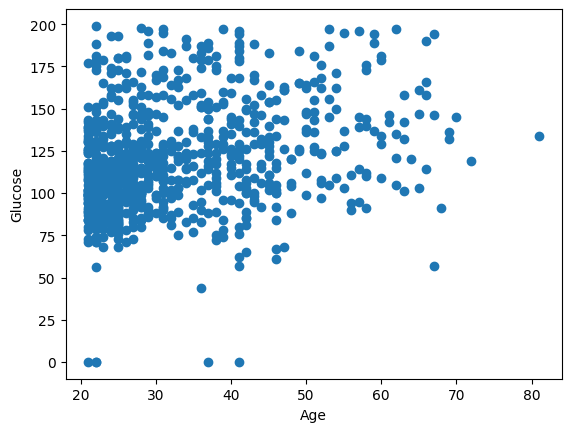

In [28]:
plt.scatter(df.Age, df.Glucose)
plt.xlabel('Age')
plt.ylabel('Glucose')

Text(0, 0.5, 'glucose_scaled')

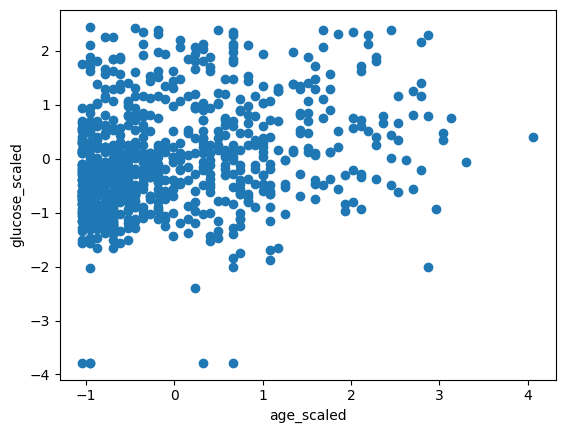

In [29]:
# Scaled the data
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.xlabel('age_scaled')
plt.ylabel('glucose_scaled')

### 3. Build and Evaluate the K-means Model

In [30]:
# Build a K-means clustering model
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
# n_clusters: number of clusters
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run

In [31]:
# Fit the Model on our dataset
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=20, random_state=1)

In [32]:
# View the Coordinates of cluster centers (i.e. the centroids)
kmeans.cluster_centers_

array([[ 1.48508412,  0.35104693],
       [-0.52961817, -0.61230807],
       [-0.26071365,  1.19774497]])

In [33]:
# Assign each data object/point to the cluster represented by its nearest centroid
y_pred = kmeans.predict(X_scaled)
y_pred

array([0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0,
       2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0,
       1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2,

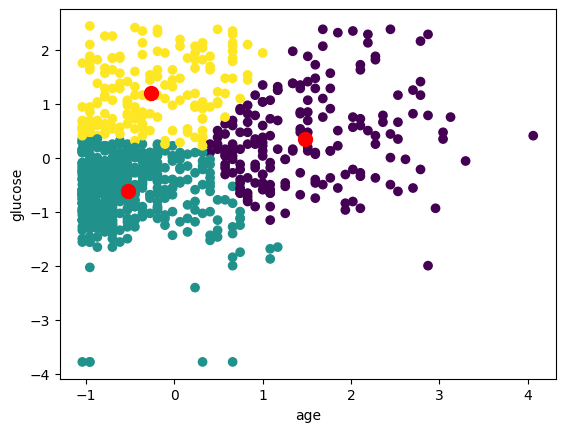

In [35]:
# Visualise the Clusters and their corresponding centroids in the below graph
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('age')
plt.ylabel('glucose')
plt.show()

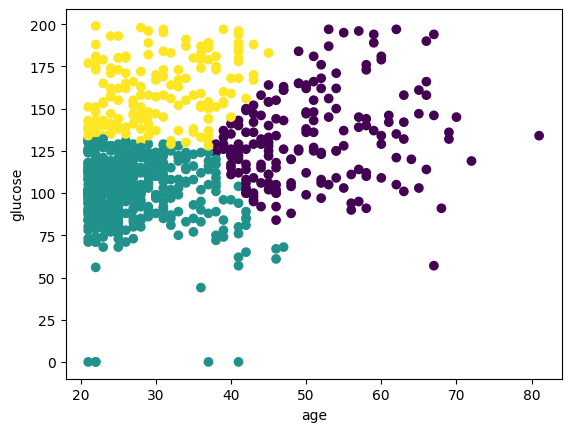

In [36]:
# Visualise the Clusters with the original age & balance values
plt.scatter(X[:,0], X[:,1], c=y_pred)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('age')
plt.ylabel('glucose')
plt.show()

In [37]:
# Evalute the model using Sum of Squared Errors (SSE)
kmeans.inertia_

592.5151885098962

### 4. Improve the Model

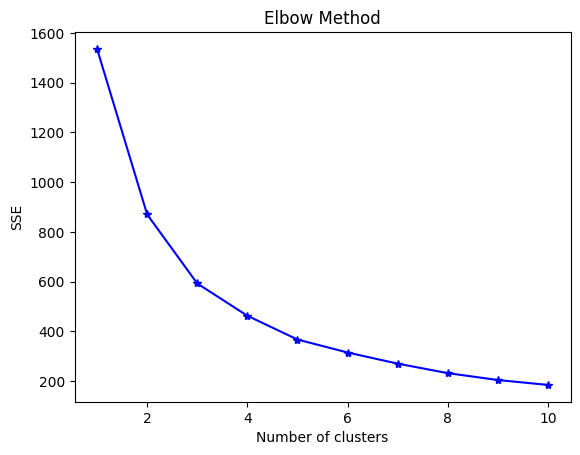

In [38]:
# Find the optimal number of clusters (i.e. K) using elbow method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

From the above graph, we can see K=5 is the optimal number of clusters for this problem.

In [39]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=6, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

### 5. Visualize the Clusters

* Visualise the Clusters and their corresponding centroids using scatter plot

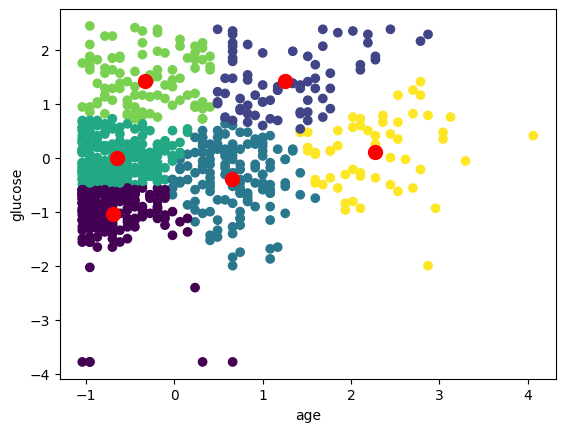

In [40]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('age')
plt.ylabel('glucose')
plt.show()

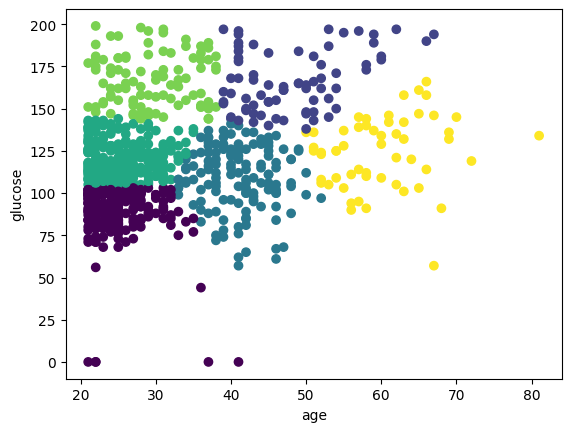

In [41]:
# Visualise the Clusters with the original value ranges
plt.scatter(X[:,0], X[:,1], c=y_pred)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('age')
plt.ylabel('glucose')
plt.show()

### 6. Intepret the Model

We can group the customers into below five clusters:

* Cluster 1: high glucose, young age
* Cluster 2: medium glucose, young age
* Cluster 3: low glucose, young age
* Cluster 4: high glucose, middle age
* Cluster 5: medium glucose, middle age
* Cluster 6: medium glucose, old age